<center><h1> Customer Churn Prediction Model </h1>
<h4>By: Ravikumar Patel </h4></center>


In [1]:
# basic library import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# to split the data into random smaller sets
from sklearn.model_selection import train_test_split

with open("Telecom_customer churn.csv", 'r') as file:
    df = pd.read_csv(file)

display(df.head())

X_train, X_test = train_test_split(df, test_size = 0.2, random_state=10)

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID
0,23.9975,219.25,22.500,0.2475,0.00,0.0,0.0,0.0,0.0,-157.25,...,0.0,N,U,U,U,U,U,Y,361.0,1000001
1,57.4925,482.75,37.425,0.2475,22.75,9.1,9.1,0.0,0.0,532.25,...,0.0,Z,U,U,U,U,U,Y,240.0,1000002
2,16.9900,10.25,16.990,0.0000,0.00,0.0,0.0,0.0,0.0,-4.25,...,0.0,N,U,Y,U,U,U,Y,1504.0,1000003
3,38.0000,7.50,38.000,0.0000,0.00,0.0,0.0,0.0,0.0,-1.50,...,0.0,U,Y,U,U,U,U,Y,1812.0,1000004
4,55.2300,570.50,71.980,0.0000,0.00,0.0,0.0,0.0,0.0,38.50,...,0.0,I,U,U,U,U,U,Y,434.0,1000005


## Data Analysis

In [2]:
# the code on this cell has been from tutorial 2 CSCI 4146 course
def buildContinuousFeaturesReport(features, data_df):
	conHead = ['Count', 'Miss %', 'Card.', 'Min', '1st Qrt.',
            'Mean', 'Median', '3rd Qrt.', 'Max', 'Std. Dev.']

	conOut_df = pd.DataFrame(index=features, columns=conHead)
	columns_df = data_df[features]

	#COUNT
	conOut_df[conHead[0]] = len(columns_df)

	#MISS % 
	conOut_df[conHead[1]] = columns_df.isna().sum() / len(columns_df) * 100

	#CARDINALITY
	conOut_df[conHead[2]] = columns_df.nunique()

	#MINIMUM
	conOut_df[conHead[3]] = columns_df.min()

	#1ST QUARTILE
	conOut_df[conHead[4]] = columns_df.quantile(0.25)

	#MEAN
	conOut_df[conHead[5]] = columns_df.mean()

	#MEDIAN
	conOut_df[conHead[6]] = columns_df.median()

	#3rd QUARTILE
	conOut_df[conHead[7]] = columns_df.quantile(0.75)

	#MAX
	conOut_df[conHead[8]] = columns_df.max()

	#STANDARD DEVIATION
	conOut_df[conHead[9]] = columns_df.std()

	return conOut_df

def buildCategoricalFeaturesReport(features, data_df):
	catHead = ['Count', 'Miss %', 'Card.', 'Mode', 'Mode Freq',
            'Mode %', '2nd Mode', '2nd Mode Freq', '2nd Mode %']

	columns_df = data_df[features]

	#preparing a dictionary for storing data
	stats_dict = {k: ['']*len(features) for k in catHead}

	#CARDINALITY
	stats_dict['Card.'] = columns_df.nunique()

	missing = columns_df.isna().sum() / len(columns_df) * 100

	for col in columns_df:
		values = columns_df[col].value_counts()
		index = features.index(col)

    #COUNT
		stats_dict['Count'][index] = len(columns_df)
		
		#MISS %
		stats_dict['Miss %'][index] = missing[col]

		#MODES
		mode = values.index[0]
		mode2 = values.index[1] if len(values.index) > 1 else mode
		stats_dict['Mode'][index] = mode
		stats_dict['2nd Mode'][index] = mode2

		#MODE FREQ
		modeCount = values.loc[mode]
		modeCount2 = values.loc[mode2]
		stats_dict['Mode Freq'][index] = modeCount
		stats_dict['2nd Mode Freq'][index] = modeCount2

		#MODE %
		miss = stats_dict['Miss %'][index]

		modePer = (modeCount/(len(columns_df)*((100-miss)/100)))*100
		stats_dict['Mode %'][index] = round(modePer, 2)

		modePer2 = (modeCount2/(len(columns_df)*((100-miss)/100)))*100
		stats_dict['2nd Mode %'][index] = round(modePer2, 2)
	
	output_df = pd.DataFrame.from_dict(stats_dict)
	return output_df

In [3]:
# build the data quality reports(DQRs) for continuous and categorical features 
dqr_continuous_listings = buildContinuousFeaturesReport(X_train.select_dtypes('number').columns.to_list(), X_train)
dqr_categorical_listings = buildCategoricalFeaturesReport(X_train.select_dtypes('object').columns.to_list(), X_train)

#display the reports
print("\nData quality report for the dataset")
with pd.option_context('display.max_rows', None, 'display.max_columns', None),\
    pd.option_context('display.float_format', '{:.2f}'.format):
      display(dqr_continuous_listings)
      display(dqr_categorical_listings)


Data quality report for the dataset


,Count,Miss %,Card.,Min,1st Qrt.,Mean,Median,3rd Qrt.,Max,Std. Dev.
rev_Mean,80000,0.36,33218,-6.17,33.28,58.61,48.32,70.71,1223.38,44.54
mou_Mean,80000,0.36,9140,0.00,150.50,512.50,355.00,702.25,7242.00,520.69
totmrc_Mean,80000,0.36,7263,-26.91,30.00,46.21,44.99,59.99,399.99,23.58
da_Mean,80000,0.36,161,0.00,0.00,0.88,0.25,0.74,72.77,2.11
ovrmou_Mean,80000,0.36,2421,0.00,0.00,40.74,2.75,42.00,4320.75,96.04
ovrrev_Mean,80000,0.36,10721,0.00,0.00,13.47,0.97,14.38,1102.40,30.31
vceovr_Mean,80000,0.36,6700,0.00,0.00,13.20,0.61,14.00,890.76,29.84
datovr_Mean,80000,0.36,686,0.00,0.00,0.26,0.00,0.00,423.54,3.18
roam_Mean,80000,0.36,4689,0.00,0.00,1.25,0.00,0.23,1112.45,9.10
change_mou,80000,0.89,7156,-3406.50,-87.25,-14.44,-6.25,63.25,5192.25,258.46


,Count,Miss %,Card.,Mode,Mode Freq,Mode %,2nd Mode,2nd Mode Freq,2nd Mode %
new_cell,80000,0.00,3,U,53426,66.78,Y,15531,19.41
crclscod,80000,0.00,54,AA,29285,36.61,A,13626,17.03
asl_flag,80000,0.00,2,N,68893,86.12,Y,11107,13.88
prizm_social_one,80000,7.39,5,S,25603,34.56,U,18865,25.46
area,80000,0.04,19,NEW YORK CITY AREA,8897,11.13,LOS ANGELES AREA,5285,6.61
dualband,80000,0.00,4,Y,57902,72.38,N,18452,23.06
refurb_new,80000,0.00,2,N,68452,85.56,R,11548,14.44
hnd_webcap,80000,10.19,3,WCMB,60669,84.44,WC,11000,15.31
ownrent,80000,33.72,2,O,51415,96.96,R,1611,3.04
dwlltype,80000,31.92,2,S,39044,71.69,M,15417,28.31


In [4]:
# move truck, rv, lor, adults, income, numbcars to categorical analysis

lst_cat = ['truck', 'rv', 'lor', 'adults', 'income', 'numbcars']

dqr_continuous_listings = dqr_continuous_listings.drop(lst_cat)

lst_cat.extend(X_train.select_dtypes('object').columns.to_list())
dqr_categorical_listings = buildCategoricalFeaturesReport(lst_cat, X_train)

#display the reports
print("\nData quality report for the dataset")
with pd.option_context('display.max_rows', None, 'display.max_columns', None),\
    pd.option_context('display.float_format', '{:.2f}'.format):
      display(dqr_continuous_listings)
      display(dqr_categorical_listings)


Data quality report for the dataset


,Count,Miss %,Card.,Min,1st Qrt.,Mean,Median,3rd Qrt.,Max,Std. Dev.
rev_Mean,80000,0.36,33218,-6.17,33.28,58.61,48.32,70.71,1223.38,44.54
mou_Mean,80000,0.36,9140,0.00,150.50,512.50,355.00,702.25,7242.00,520.69
totmrc_Mean,80000,0.36,7263,-26.91,30.00,46.21,44.99,59.99,399.99,23.58
da_Mean,80000,0.36,161,0.00,0.00,0.88,0.25,0.74,72.77,2.11
ovrmou_Mean,80000,0.36,2421,0.00,0.00,40.74,2.75,42.00,4320.75,96.04
ovrrev_Mean,80000,0.36,10721,0.00,0.00,13.47,0.97,14.38,1102.40,30.31
vceovr_Mean,80000,0.36,6700,0.00,0.00,13.20,0.61,14.00,890.76,29.84
datovr_Mean,80000,0.36,686,0.00,0.00,0.26,0.00,0.00,423.54,3.18
roam_Mean,80000,0.36,4689,0.00,0.00,1.25,0.00,0.23,1112.45,9.10
change_mou,80000,0.89,7156,-3406.50,-87.25,-14.44,-6.25,63.25,5192.25,258.46


,Count,Miss %,Card.,Mode,Mode Freq,Mode %,2nd Mode,2nd Mode Freq,2nd Mode %
truck,80000,1.72,2,0.00,63784,81.13,1.00,14839,18.87
rv,80000,1.72,2,0.00,72163,91.78,1.00,6460,8.22
lor,80000,30.19,16,1.00,8001,14.33,2.00,7216,12.92
adults,80000,23.00,6,2.00,18423,29.91,1.00,17851,28.98
income,80000,25.41,9,6.00,15039,25.20,7.00,9313,15.61
numbcars,80000,49.31,3,1.00,20492,50.54,2.00,17068,42.09
new_cell,80000,0.00,3,U,53426,66.78,Y,15531,19.41
crclscod,80000,0.00,54,AA,29285,36.61,A,13626,17.03
asl_flag,80000,0.00,2,N,68893,86.12,Y,11107,13.88
prizm_social_one,80000,7.39,5,S,25603,34.56,U,18865,25.46


### Quantitative feature analysis

#### Features with wrong high value analysis

Check values in uniqsubs


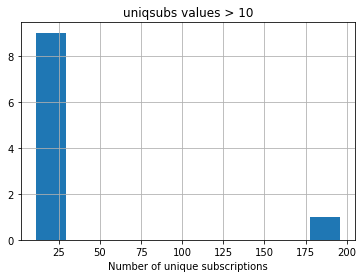

In [5]:
# uniqsubs analysis
print("Check values in uniqsubs")
plt.title("uniqsubs values > 10")
plt.xlabel("Number of unique subscriptions")
X_train[X_train['uniqsubs'] > 10]['uniqsubs'].hist()
plt.show()

Check values in actvsubs


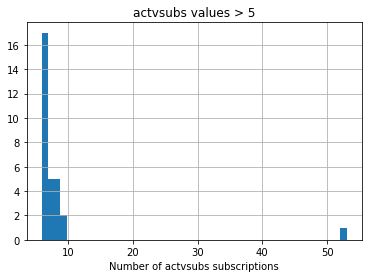

In [6]:
# actvsubs analysis
print("Check values in actvsubs")
plt.title("actvsubs values > 5")
plt.xlabel("Number of actvsubs subscriptions")
X_train[X_train['actvsubs'] > 5]['actvsubs'].hist(bins=50)
plt.show()

Check values in phones


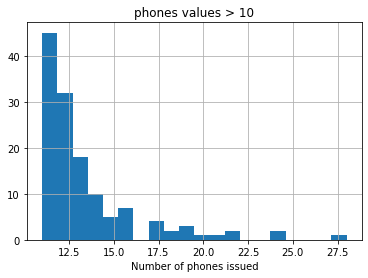

In [7]:
# phones analysis
print("Check values in phones")
plt.title("phones values > 10")
plt.xlabel("Number of phones issued")
X_train[X_train['phones'] > 10]['phones'].hist(bins=20)
plt.show()

Check values in models


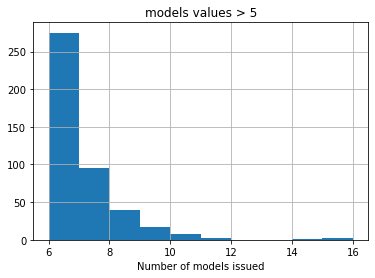

In [8]:
# models analysis
print("Check values in models")
plt.title("models values > 5")
plt.xlabel("Number of models issued")
X_train[X_train['models'] > 5]['models'].hist()
plt.show()

#### Features with wrong negative values analysis

Check values in eqpdays


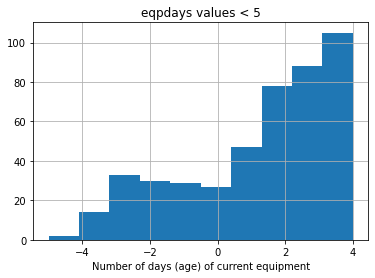

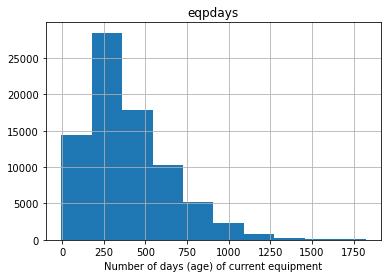

In [9]:
# eqpdays analysis
print("Check values in eqpdays")
plt.title("eqpdays values < 5")
plt.xlabel("Number of days (age) of current equipment")
X_train[X_train['eqpdays'] < 5]['eqpdays'].hist()
plt.show()

plt.title("eqpdays")
plt.xlabel("Number of days (age) of current equipment")
X_train['eqpdays'].hist()
plt.show()